# GRIP TASK3

## Exploratory Data Analysis - Retail


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [4]:
data.duplicated().sum()

17

In [5]:
data=data.replace(-1,np.float(0))
data.drop_duplicates(keep = 'first', inplace = True)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


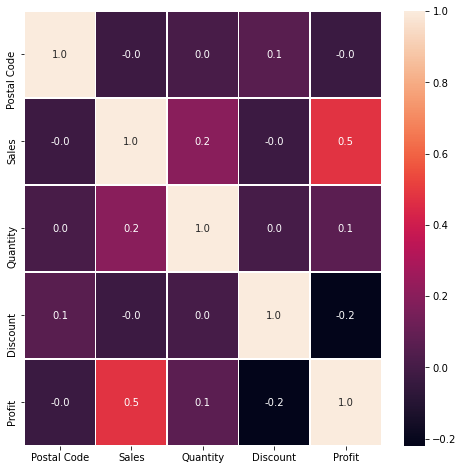

In [7]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidth=.6, fmt ='.1f', ax=ax)
plt.show()

In [8]:
data=data.drop(columns=['Ship Mode','Country','Postal Code','Discount'])
data.head()

,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,41.9136
1,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,219.5820
2,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,6.8714
3,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,-383.0310
4,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,2.5164


In [9]:
data['Segment'].value_counts()


Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

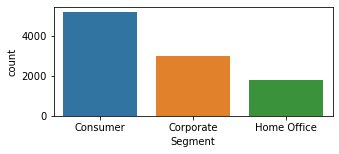

In [10]:
plt.figure(figsize=(5, 2))
sns.countplot(data = data, x = 'Segment', order = data.Segment.value_counts().index)

In [11]:
x = data.groupby(["Segment", "Category"])["Sales"].agg(["sum"]).sort_values(by = "sum", ascending = False)
x

sum
Segment     Category                    
Consumer    Technology       406399.8970
            Furniture        390659.3420
            Office Supplies  363773.5360
Corporate   Technology       246450.1190
            Office Supplies  230600.2260
            Furniture        229019.7858
Home Office Technology       183304.0170
            Office Supplies  124361.4820
            Furniture        121627.1855

<AxesSubplot:xlabel='Segment'>

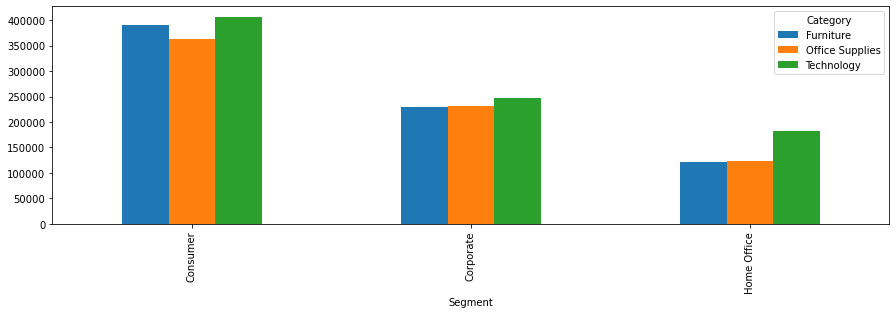

In [12]:
barplot=pd.pivot_table(x,values='sum',index='Segment',columns='Category')
barplot.plot.bar(figsize = (15, 4))

In [13]:
df_state= data.groupby(['State'])[['Sales', 'Profit']].mean()
df_state.head(10)

,Sales,Profit
State,,
Alabama,319.846557,94.865989
Arizona,157.508933,-15.303235
Arkansas,194.635500,66.811452
California,229.246629,38.241878
Colorado,176.418231,-35.867351
Connecticut,163.223866,42.823071
Delaware,285.948635,103.930988
District of Columbia,286.502000,105.958930
Florida,233.612815,-8.875461


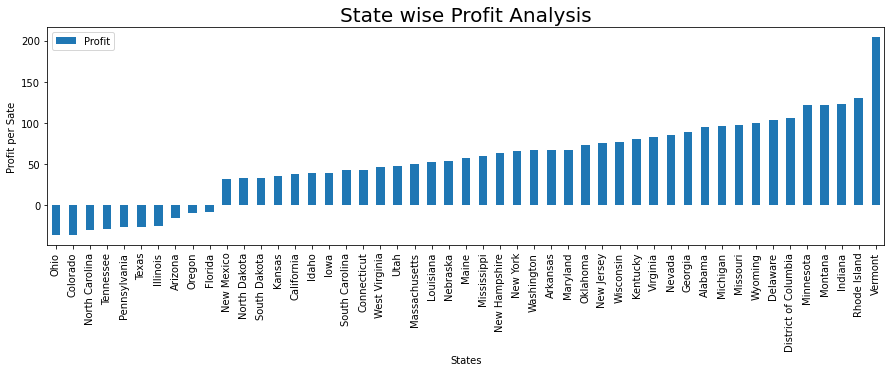

In [14]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

In [15]:
df_quantity = data.groupby(['Quantity'])[['Sales', 'Profit']].mean()
df_quantity

,Sales,Profit
Quantity,,
1,59.234632,8.276396
2,120.377982,16.027769
3,175.630896,23.720306
4,272.779827,37.227971
5,337.936339,40.257394
6,362.101960,18.051517
7,395.888393,56.579163
8,458.210802,42.244342
9,498.083683,68.557716


Text(0.5, 1.0, 'Quantity wise analysis of Sale, profit')

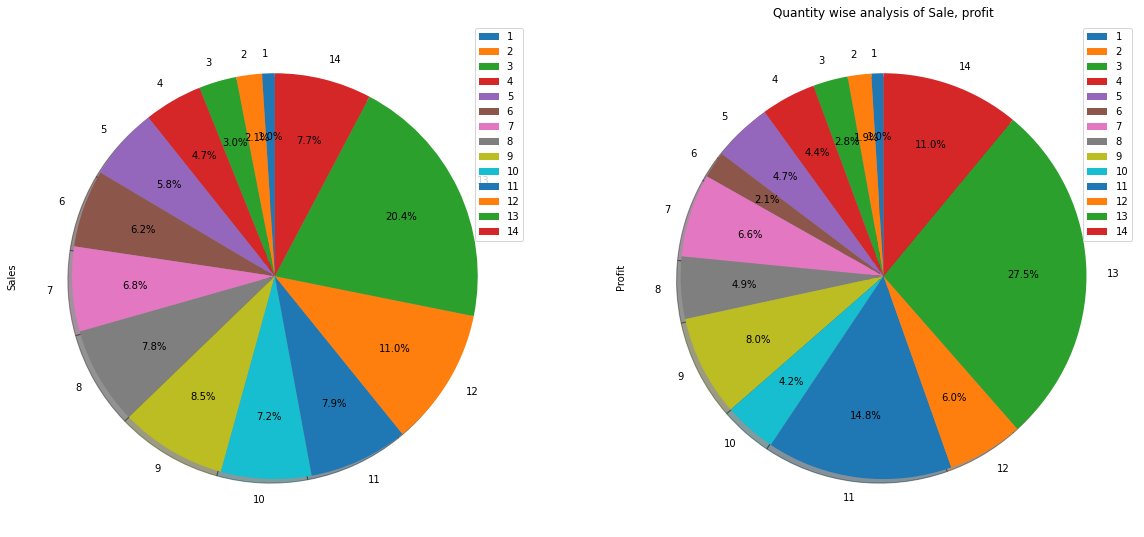

In [16]:
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20,20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, profit')

In [17]:
df_category = data.groupby(['Category'])[['Sales','Profit']].mean()
df_category

,Sales,Profit
Category,,
Furniture,350.002981,8.697740
Office Supplies,119.550107,20.353403
Technology,452.709276,78.752002


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

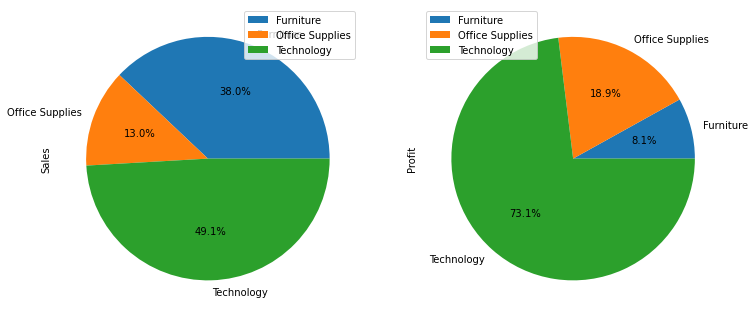

In [18]:
df_category.plot.pie(subplots=True, 
                     figsize=(12, 10), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)


Maximun sales and Profit obtain in Technology.
Minimun profit obtain in Furniture

In [19]:
df_sub_category = data.groupby(['Sub-Category'])[['Sales', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Profit
Sub-Category,,
Accessories,215.974604,54.111788
Appliances,230.755710,38.922758
Art,34.096896,8.207059
Binders,133.645972,19.860710
Bookcases,503.859633,-15.230509
Chairs,532.971969,43.198582
Copiers,2198.941618,817.909190
Envelopes,64.867724,27.418019
Fasteners,13.936774,4.375660


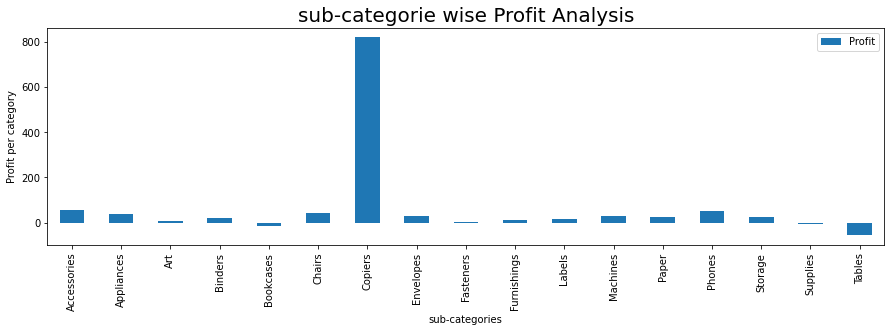

In [20]:

df_sub_category[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('sub-categorie wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per category')
plt.xlabel('sub-categories')
plt.show()

In [21]:
df_region = data.groupby(['Region'])[['Sales', 'Profit']].mean()
df_region

,Sales,Profit
Region,,
Central,215.947759,17.100421
East,238.465798,32.163905
South,241.803645,28.857673
West,227.139254,33.927281


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Profit'>],
      dtype=object)

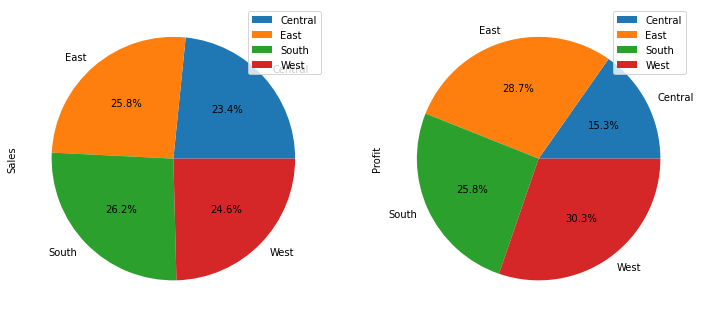

In [22]:
df_region.plot.pie(subplots=True, 
                   figsize=(12, 10), 
                   autopct='%1.1f%%',
                   labels = df_region.index)

<AxesSubplot:xlabel='Sub-Category'>

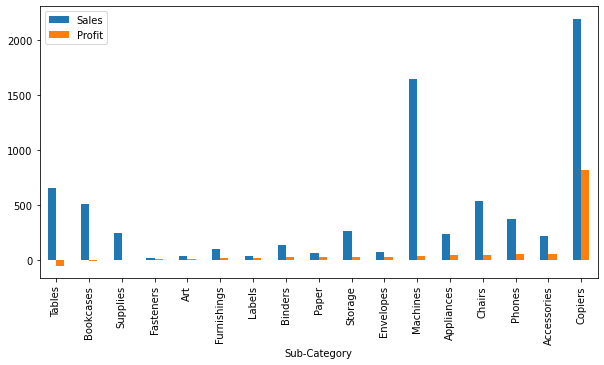

In [23]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])